In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def print_latex_table(row: list):
    print(" & ".join(row) + "\\\\")


In [ ]:
df = pd.read_csv("data/stats-prs.csv")
df = df.round(3)
x_column = "open_prs_exact"

df = df[df["x_column"] == x_column]
for project in df["project"].unique():
    project_df = df[df["project"] == project]
    row_per_satd = []
    for y_column in df["y_column"].unique():
        tmp = project_df[project_df["y_column"] == y_column]
        row_per_satd.append(str(tmp["kendal_v"].values[0]).ljust(5, "0") +" "+ str(tmp["kendal_p"].values[0]).ljust(5, "0"))
    # print(row_per_satd)
    print_latex_table([project, *row_per_satd])
    
df

In [29]:
df = pd.read_csv("data/statistics.csv")
df

,Unnamed: 0,project,kendal_v,kendal_p,spearman_v,spearman_p,y_column,x_column
0,0,druid,-0.277125,4.735713e-70,-0.463366,1.369566e-98,total_cumsum,commits_per_14days
1,1,dubbo,-0.255115,1.026321e-25,-0.369560,2.323636e-26,total_cumsum,commits_per_14days
2,2,flink,0.411421,0.000000e+00,0.604294,0.000000e+00,total_cumsum,commits_per_14days
3,3,hadoop,0.133813,3.411079e-61,0.181492,1.731210e-51,total_cumsum,commits_per_14days
4,4,maven,0.063844,2.176335e-04,0.090325,4.148065e-04,total_cumsum,commits_per_14days
...,...,...,...,...,...,...,...,...
85,85,maven,0.000240,9.971416e-01,-0.008390,9.109915e-01,documentation-debt,releases_per_60days
86,86,pulsar,0.270802,4.354471e-20,0.374336,1.150351e-20,code|design-debt,releases_per_60days
87,87,pulsar,0.275112,6.837219e-20,0.370955,2.695365e-20,test-debt,releases_per_60days
88,88,pulsar,0.270122,1.453436e-19,0.386182,5.373532e-22,requirement-debt,releases_per_60days


0.27852797849498845
0.41685518336010446
0.2274692986859784


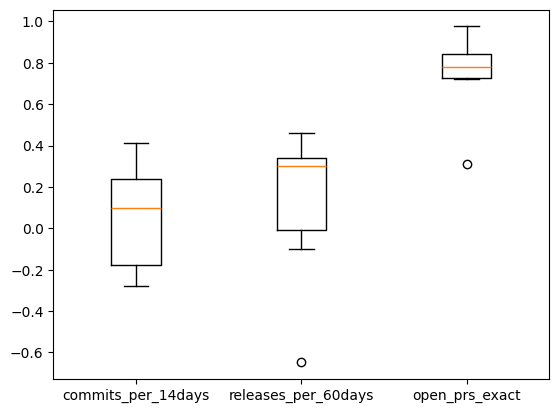

In [46]:
"""
RQ1
"""

sub_df = df[df["y_column"] == "total_cumsum"]
data = {}

for x_column in sub_df["x_column"].unique():
    interest = sub_df[sub_df["x_column"] == x_column]["kendal_v"]
    print(interest.std())
    data[x_column] = list(interest)

plt.boxplot(data.values(), labels=data.keys())
plt.show()

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'total_cumsum'),
  Text(2, 0, 'code|design-debt'),
  Text(3, 0, 'test-debt'),
  Text(4, 0, 'requirement-debt'),
  Text(5, 0, 'documentation-debt')])

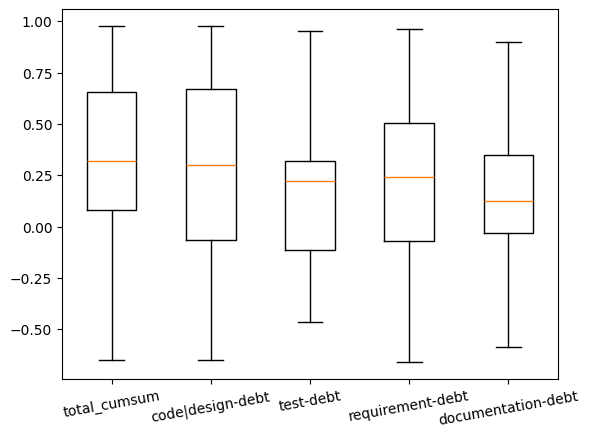

In [27]:


df = pd.read_csv("data/statistics.csv")
data = {}
for idx, column in enumerate(df["y_column"].unique()):
    sub_df = df[df["y_column"] == column]["kendal_v"]
    data[column] = df[df["y_column"] == column]["kendal_v"]
#     plt.scatter([idx]*len(data[column]), data[column], label=column)
# 
# plt.legend()
plt.boxplot(data.values(), labels=data.keys())
plt.xticks(rotation=10)